<ipython-input-1-8a92ab4909ba>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-1-8a92ab4909ba>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


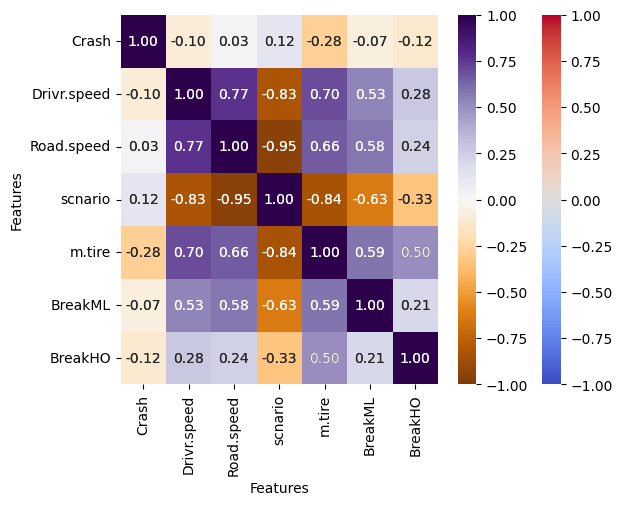

Data before balancing:
   Crash  Drivr.speed  Road.speed  scnario Condition  m.tire  BreakML  BreakHO
0      0    69.581507          80        1     clear    0.95        2        1
1      0    71.633775          80        1     clear    0.95        2        0
2      1    72.256919          80        1     clear    0.95        1        0
3      1    72.706654          80        1     clear    0.95        0        0
4      1    70.940900          80        1     clear    0.95        1        0
Number of instances before balancing: 1000
Data before balancing:
   target  Drivr.speed  scnario  BreakHO  Condition_clear  Condition_icy  \
0       0     0.702172        1        1                1              0   
1       0     0.730163        1        0                1              0   
2       1     0.738662        1        0                1              0   
3       1     0.744796        1        0                1              0   
4       1     0.720713        1        0                1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Model: SGD
Best parameters: {'alpha': 0.01, 'penalty': 'elasticnet'}
Training accuracy: 0.578
Testing accuracy: 0.597
Confusion matrix:
[[ 71   9  20  33]
 [  8  65  30  34]
 [  4  50  72  17]
 [ 16   0   0 119]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: LogitBoost
Best parameters: {'dt__n_estimators': 200, 'lr__C': 0.1}
Training accuracy: 0.936
Testing accuracy: 0.932
Confusion matrix:
[[109   4   4  16]
 [  4 133   0   0]
 [  0   0 143   0]
 [  9   0   0 126]]



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from matplotlib.colors import ListedColormap

# Load the dataset
data = pd.read_csv("/content/data (1).csv")

data.head()

# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps
#corr.style.background_gradient(cmap='RdYlGn').set_precision(2)
#corr.style.background_gradient(cmap='PuOr')
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")

import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr, cmap='PuOr', vmin=-1, vmax=1, annot=True, fmt=".2f")

# Add axis labels
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

# Print the data before balancing
print("Data before balancing:")
print(data.head())

# Print the number of instances before balancing
print("Number of instances before balancing:", data.shape[0])

# perform one-hot encoding on the 'Condition' column
#data = pd.get_dummies(data, columns=['Condition','Road.speed', 'm.tire', 'BreakML', 'BreakHO']) 
data = pd.get_dummies(data, columns=['Condition','Road.speed', 'm.tire', 'BreakML']) 

# create the MinMaxScaler object
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the numerical columns and transform them
data[['Drivr.speed']] = scaler.fit_transform(data[['Drivr.speed']])
# Rename the target variable to 'target'
data = data.rename(columns={'Crash': 'target'})

# Split the data into features and labels
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
data.head()

# Print the data before balancing
print("Data before balancing:")
print(data.head())

# Print the number of instances before balancing
print("Number of instances before balancing:", data.shape[0])

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled data back into a dataframe
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)


# Split the balanced data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Oversample the minority class on the training set only
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models
models = [
    {'name': 'AdaBoost', 'model': AdaBoostClassifier()},
    {'name': 'GradientBoosting', 'model': GradientBoostingClassifier()},
    {'name': 'XGBoost', 'model': xgb.XGBClassifier()},
    {'name': 'LightGBM', 'model': lgb.LGBMClassifier()},
    {'name': 'SGD', 'model': SGDClassifier(loss='log')},
    {'name': 'LogitBoost', 'model': StackingClassifier(estimators=[('lr', LogisticRegression()), ('dt', GradientBoostingClassifier())], final_estimator=LogisticRegression())}
]

# Define hyperparameters to tune
params = {
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.5, 1]},
    'SGD': {'alpha': [0.0001, 0.001, 0.01], 'penalty': ['l2', 'l1', 'elasticnet']},
    'LogitBoost': {'lr__C': [0.1, 1, 10], 'dt__n_estimators': [50, 100, 200]}
}
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Define grid search parameters
cv = 10
scoring = 'accuracy'

from sklearn.metrics import confusion_matrix

# Train and evaluate models
results = []
for model in models:
    grid = GridSearchCV(model['model'], params[model['name']], cv=cv, scoring=scoring)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    result = {
        'name': model['name'],
        'best_params': grid.best_params_,
        'train_score': grid.best_score_,
        'test_score': grid.score(X_test, y_test),
        'cv_results': grid.cv_results_,
        'confusion_matrix': conf_matrix
    }
    results.append(result)
    
    # Print results
    print('Model: {}'.format(result['name']))
    print('Best parameters: {}'.format(result['best_params']))
    print('Training accuracy: {:.3f}'.format(result['train_score']))
    print('Testing accuracy: {:.3f}'.format(result['test_score']))
    print('Confusion matrix:')
    print(conf_matrix)
    print()



Model: AdaBoost
Best parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Training accuracy: 0.416
Testing accuracy: 0.378
Confusion matrix:
[[62 34  0 37]
 [61 66  0 10]
 [56 70 17  0]
 [23 49  1 62]]



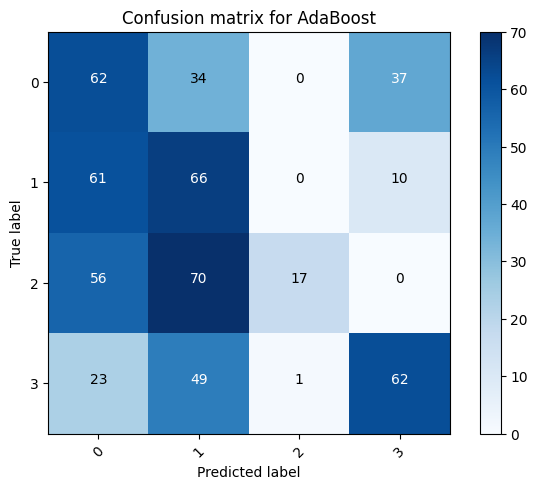

Model: GradientBoosting
Best parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
Training accuracy: 0.963
Testing accuracy: 0.953
Confusion matrix:
[[112   5   3  13]
 [  0 137   0   0]
 [  0   0 143   0]
 [  5   0   0 130]]



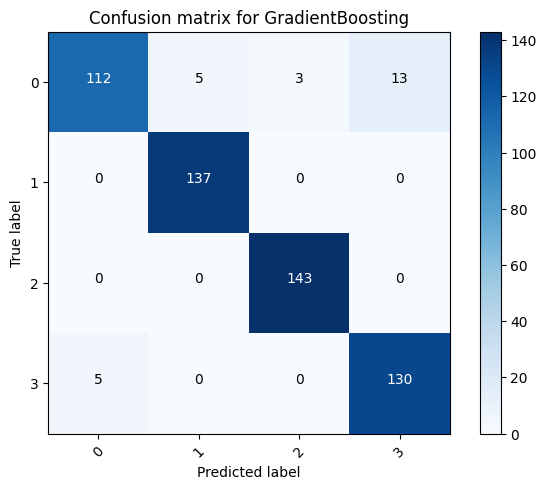

Model: XGBoost
Best parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Training accuracy: 0.959
Testing accuracy: 0.960
Confusion matrix:
[[116   3   3  11]
 [  0 137   0   0]
 [  0   0 143   0]
 [  5   0   0 130]]



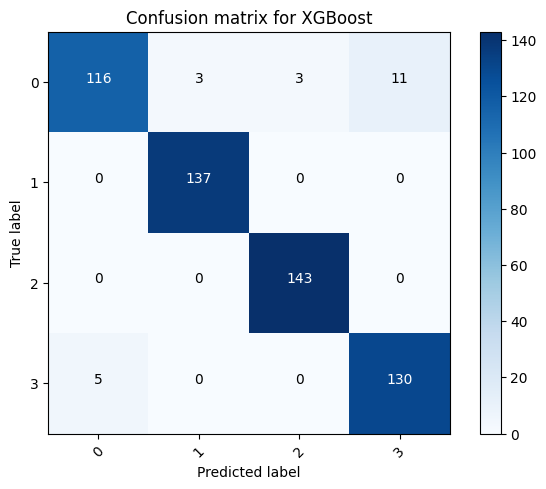

Model: LightGBM
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Training accuracy: 0.941
Testing accuracy: 0.940
Confusion matrix:
[[112   4   2  15]
 [  0 137   0   0]
 [  0   0 143   0]
 [ 12   0   0 123]]



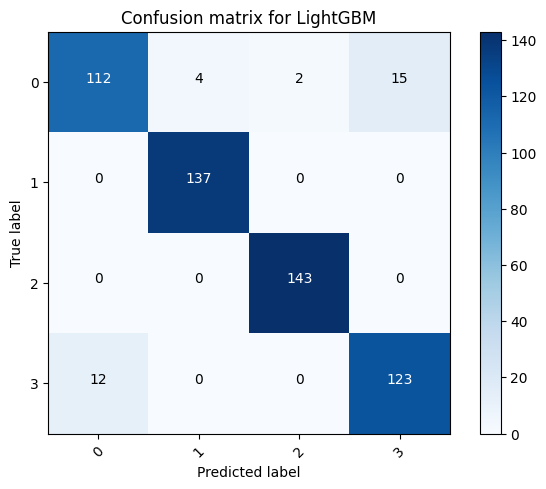

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

Model: SGD
Best parameters: {'alpha': 0.01, 'penalty': 'l2'}
Training accuracy: 0.587
Testing accuracy: 0.600
Confusion matrix:
[[ 71   9  20  33]
 [  8  64  31  34]
 [  4  47  75  17]
 [ 16   0   0 119]]



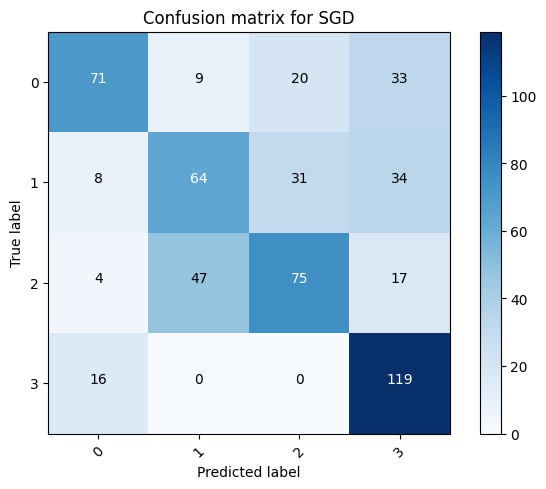

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: LogitBoost
Best parameters: {'dt__n_estimators': 200, 'lr__C': 0.1}
Training accuracy: 0.936
Testing accuracy: 0.932
Confusion matrix:
[[109   4   4  16]
 [  4 133   0   0]
 [  0   0 143   0]
 [  9   0   0 126]]



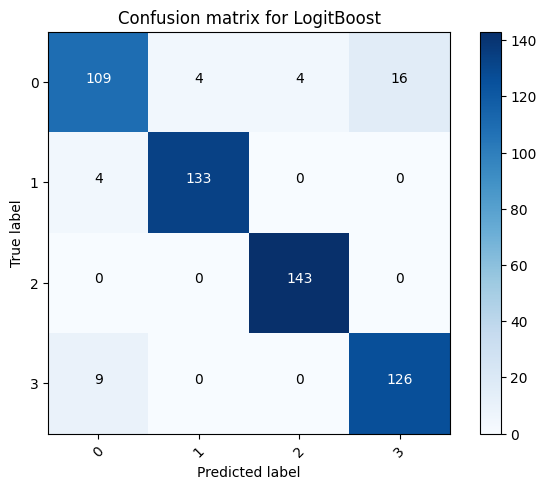

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


# Train and evaluate models
results = []
for model in models:
    grid = GridSearchCV(model['model'], params[model['name']], cv=cv, scoring=scoring)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    result = {
        'name': model['name'],
        'best_params': grid.best_params_,
        'train_score': grid.best_score_,
        'test_score': grid.score(X_test, y_test),
        'cv_results': grid.cv_results_,
        'confusion_matrix': conf_matrix
    }
    results.append(result)
    
    # Print results
    print('Model: {}'.format(result['name']))
    print('Best parameters: {}'.format(result['best_params']))
    print('Training accuracy: {:.3f}'.format(result['train_score']))
    print('Testing accuracy: {:.3f}'.format(result['test_score']))
    print('Confusion matrix:')
    print(conf_matrix)
    print()

    # Plot confusion matrix
    plt.figure()
    classes = np.unique(y_test)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix for {}'.format(model['name']))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, format(conf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
